# zaladowanie danych


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/v-dem/V-Dem-CY-Full+Others-v14.csv')

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
!pip install linearmodels
!pip install stargazer

df1 = df[(df['year']>1994)&(df['v2elparlel'] != 3)][['country_name', 'year', 'v2x_libdem', 'v2cacamps', 'v2x_feduni', 'v2x_regime', 'v2elparlel', 'v2elmulpar', 'e_gdppc', 'v2xeg_eqdr', 'v2juhcind', 'v2xeg_eqprotec', 'v2peasbsoc', 'v2smpolsoc']]
df1['e_gdppc_log'] = np.log(df1['e_gdppc'])


df1['polar_n'] = (df1['v2cacamps'] - df1['v2cacamps'].min()) / (df1['v2cacamps'].max() - df1['v2cacamps'].min())
df1= df1.drop(columns=['v2cacamps'])

df1['v2smpolsoc_n'] = (-1)*(df1['v2smpolsoc'] - df1['v2smpolsoc'].min()) / (df1['v2smpolsoc'].max() - df1['v2smpolsoc'].min())
df1= df1.drop(columns=['v2smpolsoc'])

df1['v2elmulpar_n'] = (df1['v2elmulpar'] - df1['v2elmulpar'].min()) / (df1['v2elmulpar'].max() - df1['v2elmulpar'].min())
df1= df1.drop(columns=['v2elmulpar'])

df1['v2x_libdem_logit'] = np.log(df1['v2x_libdem'] / (1 - df1['v2x_libdem']))


df1 = df1.set_index(['country_name', 'year'])


#dummies dla parlel
dummies_parlel = pd.get_dummies(df1['v2elparlel'], prefix='parlel', drop_first=True)
df1 = pd.concat([df1, dummies_parlel], axis = 1)

df1 = df1.rename(columns={'v2x_libdem':'libdem', 'v2x_feduni':'feduni', 'v2elparlel': 'parlel', 'v2x_libdem_logit':'libdem_logit',
                          'parlel_1.0':'Prop', 'parlel_2.0': 'Mixed', 'v2x_regime':'regime', 'v2elmulpar_n':'mulpar_n',
                          'e_gdppc_log':'log_gdp_pc', 'v2xeg_eqdr':'equal', 'v2juhcind':'hc_indep', 'v2xeg_eqprotec':'eq_rights_prot', 'v2peasbsoc':'buss_oport', 'v2smpolsoc_n':'pol_of_society_n'})

df1['Prop'] = df1['Prop'].astype(int)
df1['Mixed'] = df1['Mixed'].astype(int)

df1['polar_X_Equal'] = df1['polar_n']*df1['equal']
df1['polar_X_Prop'] = df1['polar_n']*df1['Prop']
df1['polar_X_Mixed'] = df1['polar_n']*df1['Mixed']
df1['polar_X_gdp_pc_log'] = df1['polar_n']*df1['log_gdp_pc']
df1['polar_X_mulpar'] = df1['polar_n']*df1['mulpar_n']
df1['polar_X_feduni'] = df1['polar_n']*df1['feduni']
df1['polar_X_hc_indep'] = df1['polar_n']*df1['hc_indep']
df1['polar_X_eq_rights_prot'] = df1['polar_n']*df1['eq_rights_prot']
df1['polar_X_buss_oport'] = df1['polar_n']*df1['buss_oport']

df1 = df1.dropna()

Mounted at /content/drive


<ipython-input-2-47b19fa27f46>:6: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/v-dem/V-Dem-CY-Full+Others-v14.csv')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
df1['feduni'].loc[slice(None), 2018].sort_values(ascending=False)

,feduni
country_name,
Switzerland,0.997
Italy,0.995
Spain,0.994
United States of America,0.994
Japan,0.992
...,...
Equatorial Guinea,0.000
Kuwait,0.000
Singapore,0.000


In [ ]:
df[(df['country_name']=='Brazil')&(df['year']>2000)][['year','v2jureview']]

,year,v2jureview
2902,2001,1.975
2903,2002,1.975
2904,2003,1.975
2905,2004,1.975
2906,2005,1.975
2907,2006,1.975
2908,2007,1.975
2909,2008,1.975
2910,2009,1.975
2911,2010,1.975


In [ ]:
df[df['year']==2019][['year', 'country_name', 'v2jureview']].sort_values(by= 'v2jureview', ascending=False).head(20)

,year,country_name,v2jureview
2920,2019,Brazil,1.975
3155,2019,United States of America,1.952
22060,2019,Greece,1.908
15792,2019,Uruguay,1.906
9968,2019,Canada,1.904
2685,2019,Poland,1.890
6664,2019,South Korea,1.888
1878,2019,Albania,1.885
10327,2019,Botswana,1.865
6689,2019,Kosovo,1.864


# statystyki opisowe


In [ ]:
import pandas as pd

# Wybierz kolumny do analizy
selected_columns = ['polar_n', 'Prop', 'Prop', 'Mixed','feduni','mulpar_n','log_gdp_pc','equal']  # Zamień na swoje kolumny
df_selected = df1[selected_columns]

# Oblicz statystyki opisowe
descriptive_stats = df_selected.describe(percentiles=[0.25, 0.5, 0.75]).T
descriptive_stats.rename(columns={
    'count': 'N',
    'mean': 'Mean',
    'std': 'St. Dev.',
    'min': 'Min',
    '25%': 'Pctl(25)',
    '50%': 'Median',
    '75%': 'Pctl(75)',
    'max': 'Max'
}, inplace=True)

# Dodanie liczby całkowitych obserwacji (N)
descriptive_stats['N'] = df_selected.count()

# Resetowanie indeksu
descriptive_stats.reset_index(inplace=True)
descriptive_stats.rename(columns={'index': 'Statistic'}, inplace=True)

# Wyświetlenie tabeli
print(descriptive_stats)

# Eksport do pliku CSV lub LaTeX
descriptive_stats.to_csv('descriptive_statistics.csv', index=False)


    Statistic     N      Mean  St. Dev.       Min  Pctl(25)    Median  \
0     polar_n  3969  0.456154  0.170647  0.000000  0.329974  0.465116   
1        Prop  3969  0.431343  0.495326  0.000000  0.000000  0.000000   
2        Prop  3969  0.431343  0.495326  0.000000  0.000000  0.000000   
3       Mixed  3969  0.196271  0.397226  0.000000  0.000000  0.000000   
4      feduni  3969  0.505430  0.334045  0.000000  0.287000  0.467000   
5    mulpar_n  3969  0.748341  0.221921  0.000000  0.640475  0.851705   
6  log_gdp_pc  3969  2.071743  1.145964 -0.846298  1.115797  2.130966   
7       equal  3969  0.603176  0.277345  0.071000  0.336000  0.646000   

   Pctl(75)       Max  
0  0.585271  1.000000  
1  1.000000  1.000000  
2  1.000000  1.000000  
3  0.000000  1.000000  
4  0.887000  0.998000  
5  0.908046  1.000000  
6  3.033943  4.526008  
7  0.882000  0.985000  


# stargazer

In [ ]:
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

ponizej stargazer z wybolodwanymi finalnymi zmiennymi istotnymi


In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Kolejność wyświetlanych zmiennych
variable_order = [
    "polar_n", "pol_of_society_n",
     "polar_X_mulpar", "polar_X_Mixed", "polar_X_Prop",  "polar_X_feduni", "polar_X_hc_indep", "polar_X_gdp_pc_log", "polar_X_Equal",
    "mulpar_n","Mixed", "Prop","feduni", 'hc_indep',
    "log_gdp_pc",
    "equal", "const"
]

# Zmienne, które chcesz pogrubić
#bold_variables = ["polar_n", "polar_X_feduni", "feduni", "equal", "log_gdp_pc", "hc_indep", "mulpar_n", "pol_of_society_n"]

# Stargazer z ustawieniem kolejności zmiennych
stargazer = Stargazer([m1, m2, m3, m4])
stargazer.covariate_order(variable_order)

# Renderowanie tabeli HTML
html_output = stargazer.render_html()

# Pogrubianie nazw zmiennych i współczynników w kodzie HTML
for var in bold_variables:
    # Pogrubianie nazwy zmiennej
    html_output = html_output.replace(f">{var}<", f"><b>{var}</b><")

    # Pogrubianie współczynników związanych z tą zmienną
    html_output = html_output.replace(f">{var}</td><td>", f"><b>{var}</b></td><td><b>")
    html_output = html_output.replace(f">{var}</td> <td>", f"><b>{var}</b></td> <td><b>")  # Obsługa różnych formatów

    # Dodanie zamknięcia tagu <b> dla końca współczynników
    html_output = html_output.replace(f"</td><td><b>", f"</td><td>").replace(f"</b><td>", f"</td>")

# Wyświetlenie tabeli z pogrubionymi zmiennymi i współczynnikami
HTML(html_output)


In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

models = [m1, m2, m3, m4]

# Oblicz Adjusted R² (na bazie within R²)
adjusted_r2_values = []
for model in models:
    try:
        r2 = model.rsquared_within
        n = model.nobs
        k = model.params.shape[0]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        adjusted_r2_values.append(round(adj_r2, 3))
    except Exception:
        adjusted_r2_values.append("n/a")

# Stargazer
stargazer = Stargazer(models)
stargazer.covariate_order([
    "polar_n", "pol_of_society_n",
     "polar_X_mulpar", "polar_X_Mixed", "polar_X_Prop",  "polar_X_feduni", "polar_X_hc_indep", "polar_X_gdp_pc_log", "polar_X_Equal",
    "mulpar_n","Mixed", "Prop","feduni", 'hc_indep',
    "log_gdp_pc",
    "equal", "const"
])

html_output = stargazer.render_html()

# Dodanie Adjusted R² do tabeli
adjusted_r2_row = "<tr><td><b>Adjusted R² (within)</b></td>" + "".join([f"<td>{val}</td>" for val in adjusted_r2_values]) + "</tr>"
insert_position = html_output.find("</table>")
html_output = html_output[:insert_position] + adjusted_r2_row + html_output[insert_position:]

# Pogrubianie zmiennych
bold_variables = ["polar_n", "polar_X_feduni", "feduni", "equal", "log_gdp_pc", "hc_indep", "mulpar_n", "pol_of_society_n"]
for var in bold_variables:
    html_output = html_output.replace(f">{var}<", f"><b>{var}</b><")
    html_output = html_output.replace(f">{var}</td><td>", f"><b>{var}</b></td><td><b>")
    html_output = html_output.replace(f">{var}</td> <td>", f"><b>{var}</b></td> <td><b>")
    html_output = html_output.replace(f"</td><td><b>", f"</td><td>").replace(f"</b><td>", f"</td>")

# Wyświetlenie
HTML(html_output)


In [ ]:
# Zapisz tabelę jako osobny plik HTML
with open("stargazer_table.html", "w") as f:
    f.write(html_output)

In [ ]:
from google.colab import files
files.download("stargazer_table.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# zakładając, że masz DataFrame df
corr, p_value = pearsonr(df1['polar_n'], df1['pol_of_society_n'])

print(f"Korelacja Pearsona: {corr:.3f}, p-wartość: {p_value:.4f}")

Korelacja Pearsona: 0.658, p-wartość: 0.0000


# panel OLS newey-west

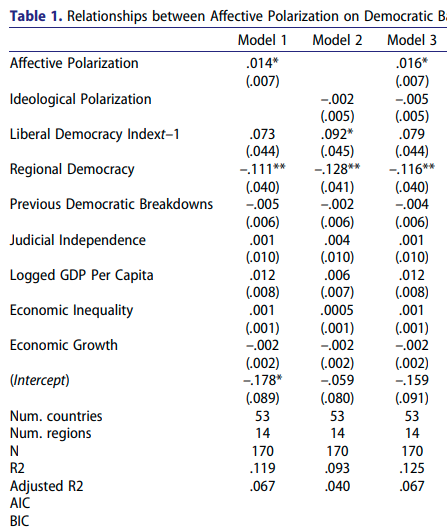

In [ ]:
df1=df1.reset_index()
df1['polar_X_year'] = df1['polar_n']*df1['year']
df1=df1.set_index(['country_name', 'year'])

In [ ]:
# Posortuj MultiIndex
df1 = df1.sort_index()

# Wybierz wiersze, gdzie index 'year' jest większy niż 1999 (czyli >= 2000)
dfx = df1.loc[(slice(None), slice(2000, None)), :]

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['polar_n',
         'polar_X_feduni','polar_X_hc_indep', 'polar_X_Equal', 'polar_X_Prop', 'polar_X_Mixed', 'polar_X_mulpar', 'polar_X_gdp_pc_log', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal', 'hc_indep', 'Prop', 'Mixed']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
m1 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(m1.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5518
Estimator:                   PanelOLS   R-squared (Between):              0.7188
No. Observations:                 771   R-squared (Within):               0.5311
Date:                Thu, May 29 2025   R-squared (Overall):              0.7134
Time:                        06:38:34   Log-likelihood                    1471.0
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      47.038
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                  F(15,573)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['pol_of_society_n',
         'polar_X_feduni', 'polar_X_Equal','polar_X_hc_indep', 'polar_X_Prop', 'polar_X_Mixed', 'polar_X_mulpar', 'polar_X_gdp_pc_log', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal', 'hc_indep', 'Prop', 'Mixed']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
m2 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(m2.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5579
Estimator:                   PanelOLS   R-squared (Between):              0.7389
No. Observations:                 771   R-squared (Within):               0.5242
Date:                Thu, May 29 2025   R-squared (Overall):              0.7333
Time:                        06:38:36   Log-likelihood                    1476.2
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      48.203
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                  F(15,573)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['polar_n', 'pol_of_society_n',
         'polar_X_feduni', 'polar_X_Equal', 'polar_X_hc_indep','polar_X_Prop', 'polar_X_Mixed', 'polar_X_mulpar', 'polar_X_gdp_pc_log', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal', 'hc_indep', 'Prop', 'Mixed']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
m3 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(m3.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5633
Estimator:                   PanelOLS   R-squared (Between):              0.7047
No. Observations:                 771   R-squared (Within):               0.5278
Date:                Thu, May 29 2025   R-squared (Overall):              0.7009
Time:                        06:38:37   Log-likelihood                    1481.0
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      46.107
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                  F(16,572)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['polar_n' , 'pol_of_society_n',
          'mulpar_n', 'feduni', 'hc_indep','Prop', 'Mixed',]]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
m4 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(m4.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5505
Estimator:                   PanelOLS   R-squared (Between):              0.7315
No. Observations:                 771   R-squared (Within):               0.5280
Date:                Thu, May 29 2025   R-squared (Overall):              0.7263
Time:                        06:38:39   Log-likelihood                    1469.9
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      101.66
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                   F(7,581)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep, bez pol_of_society_n

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['polar_n',
         'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal', 'hc_indep', 'Prop', 'Mixed']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
model_panel_nw_istot = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(model_panel_nw_istot.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5450
Estimator:                   PanelOLS   R-squared (Between):              0.7366
No. Observations:                 771   R-squared (Within):               0.5226
Date:                Wed, May 28 2025   R-squared (Overall):              0.7292
Time:                        20:32:35   Log-likelihood                    1465.2
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      69.244
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                  F(10,578)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
# bez zmiennych nieistotnych, z pol_of_society, z hc_indep

from linearmodels import PanelOLS
from statsmodels.tools import add_constant

# Definicja zmiennych objaśniających i zależnej
X = df1[['polar_n', 'pol_of_society_n', 'feduni', 'mulpar_n', 'hc_indep', 'log_gdp_pc', 'equal']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
m5 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(m5.summary)


Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.5452
Estimator:                   PanelOLS   R-squared (Between):              0.7515
No. Observations:                 771   R-squared (Within):               0.5082
Date:                Wed, May 28 2025   R-squared (Overall):              0.7422
Time:                        20:23:17   Log-likelihood                    1465.3
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      99.489
Entities:                         164   P-value                           0.0000
Avg Obs:                       4.7012   Distribution:                   F(7,581)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust

In [ ]:
import pandas as pd
from linearmodels import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.diagnostic import het_white

# Zakładam, że masz już wczytany zbiór danych 'df1', który zawiera odpowiednie kolumny

# Definicja zmiennych objaśniających (X) i zależnej (y)
X = df1[['polar_n',
         'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal']]

y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = add_constant(X)

# Utworzenie modelu PanelOLS
model_panel_nw_istot = PanelOLS(y, X, entity_effects=True, time_effects=True).fit(cov_type='kernel', kernel='newey-west')

# Wyświetlenie wyników modelu
print("\nModel z korektą Neweya-Westha, bez nieistotnych:")
print(model_panel_nw_istot.summary)

# Przeprowadzenie testu White'a na resztach modelu
white_test = het_white(model_panel_nw_istot.resids, model_panel_nw_istot.model.exog)

# Wyświetlenie wyników testu White'a
print("\nTest White'a:")
print(f"Statystyka testu: {white_test[0]}")
print(f"P-value: {white_test[1]}")



Model z korektą Neweya-Westha, bez nieistotnych:
                          PanelOLS Estimation Summary                           
Dep. Variable:                 libdem   R-squared:                        0.3623
Estimator:                   PanelOLS   R-squared (Between):              0.6656
No. Observations:                3969   R-squared (Within):               0.3510
Date:                Thu, Jan 23 2025   R-squared (Overall):              0.6461
Time:                        18:03:27   Log-likelihood                    6357.0
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      305.94
Entities:                         168   P-value                           0.0000
Avg Obs:                       23.625   Distribution:                  F(7,3770)
Min Obs:                       8.0000                                           
Max Obs:                       25.000   F-statistic (robust

TypeError: float() argument must be a string or a real number, not 'PanelData'

# wersja z mikrodanymi (rok 2018)

In [ ]:
df2 = df1.copy()
df2 = df2.reset_index()
df2 = df2.set_index('country_name')
df2 = df2[df2['year']==2000]

In [ ]:
#wszytskie zmienne - w tym nieistotne
X = df2[['polar_n', 'polar_X_Prop', 'polar_X_Mixed', 'polar_X_gdp_pc_log', 'polar_X_mulpar', 'polar_X_feduni',  'polar_X_Equal', 'equal', 'feduni', 'mulpar_n','Prop', 'Mixed', 'log_gdp_pc']]
X = sm.add_constant(X)
y = df2['libdem']
m2018_nieist = sm.OLS(y, X).fit(cov_type='HC0')
print(m2018_nieist.summary())

                            OLS Regression Results                            
Dep. Variable:                 libdem   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     139.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.94e-71
Time:                        16:01:32   Log-Likelihood:                 127.55
No. Observations:                 149   AIC:                            -227.1
Df Residuals:                     135   BIC:                            -185.0
Df Model:                          13                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3385      0

In [ ]:
# bez zmiennych nieistotnych
X = df2[['polar_n', 'polar_X_mulpar',  'polar_X_Equal', 'equal', 'feduni', 'mulpar_n', 'log_gdp_pc']]
X = sm.add_constant(X)
y = df2['libdem']
m2018_bez_nieist = sm.OLS(y, X).fit(cov_type='HC0')
print(m2018_bez_nieist.summary())

                            OLS Regression Results                            
Dep. Variable:                 libdem   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.45e-69
Time:                        10:04:16   Log-Likelihood:                 121.44
No. Observations:                 149   AIC:                            -226.9
Df Residuals:                     141   BIC:                            -202.8
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3465      0.069     -5.

# heterosked

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Przygotowanie danych
X = df1[['polar_n', 'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal']]
y = df1['libdem']

# Dodanie stałej do zmiennych objaśniających
X = sm.add_constant(X)

# OLS model jako podstawa dla testu
ols_model = sm.OLS(y, X).fit()

# Test Breuscha-Pagana na heteroskedastyczność
lm_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)

# Wyniki testu
print("LM statystyka:", lm_test[0])  # Statystyka LM
print("P-value:", lm_test[1])        # Wartość p
print("F-statystyka:", lm_test[2])   # Statystyka F
print("P-value F:", lm_test[3])      # Wartość p dla statystyki F


LM statystyka: 215.03782308858797
P-value: 7.453954430570283e-43
F-statystyka: 32.41393558185541
P-value F: 4.516539448086995e-44


odrzucenie h0, heteroskedastycznosc w modelu

In [ ]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Przygotowanie danych
X = df1[['polar_n', 'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal']]
y = df1['libdem']

# Dodanie stałej
X = sm.add_constant(X)

# Dopasowanie modelu OLS (z resztami z PanelOLS powinno działać podobnie)
ols_model = sm.OLS(y, X).fit()

# Test White'a
white_test = het_white(ols_model.resid, ols_model.model.exog)

# Wyniki testu White'a
print("Statystyka White'a:", white_test[0])  # Statystyka testu
print("P-value:", white_test[1])             # Wartość p
print("F-statystyka:", white_test[2])        # F-statystyka
print("P-value F:", white_test[3])           # Wartość p dla F-statystyki


Statystyka White'a: 432.90781309008406
P-value: 8.715163617358622e-72
F-statystyka: 15.058335075990156
P-value F: 1.5987433054298114e-76


odrzucamy h0 - mamy heteroskedastycznosc w modelu


# autokorelacja

In [ ]:
from linearmodels.panel import PanelOLS
import numpy as np
from scipy.stats import f


# Pobranie reszt modelu
residuals = model_panel_nw_istot.resids

# Grupowanie reszt według jednostek (entity)
df_residuals = residuals.to_frame()
df_residuals['unit'] = residuals.index.get_level_values(0)  # Dodaj identyfikator jednostek
df_residuals['time'] = residuals.index.get_level_values(1)  # Dodaj identyfikator czasu

# Tworzenie różnic reszt w czasie (t - t-1)
df_residuals['lagged_resid'] = df_residuals.groupby('unit')['residual'].shift(1)

# Usunięcie brakujących wartości wynikających z różnicowania
df_residuals = df_residuals.dropna()

# Regresja reszt na opóźnione reszty (test pomocniczy Wooldridge'a)
from statsmodels.api import OLS, add_constant

y = df_residuals['residual']  # Reszty
X = add_constant(df_residuals['lagged_resid'])  # Opóźnione reszty jako regresory

model_aux = OLS(y, X).fit()
r_squared = model_aux.rsquared  # Wyliczenie R^2

# Obliczenie statystyki testu Wooldridge'a
n_units = residuals.index.get_level_values(0).nunique()  # Liczba jednostek
F_stat = r_squared / (1 - r_squared) * (n_units - 1)  # Statystyka F
p_value = 1 - f.cdf(F_stat, 1, n_units - 1)  # P-wartość

# Wyniki testu
print("Statystyka testu Wooldridge'a:", F_stat)
print("P-wartość:", p_value)

if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Występuje autokorelacja reszt.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Brak autokorelacji reszt.")


Statystyka testu Wooldridge'a: 311.1905854756133
P-wartość: 1.1102230246251565e-16
Odrzucamy hipotezę zerową: Występuje autokorelacja reszt.


# test Hausmana FE vs RE

In [ ]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS, RandomEffects
from scipy.stats import chi2


# Definiowanie zmiennych
X = df1[['polar_n',
         'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal']]
y = df1['libdem']

# Model z efektami stałymi (FE)
model_fe = PanelOLS(y, X, entity_effects=True)
fe_results = model_fe.fit()

# Model z efektami losowymi (RE)
model_re = RandomEffects(y, X)
re_results = model_re.fit()

# Test Hausmana
# Oblicz różnicę współczynników
beta_diff = fe_results.params - re_results.params

# Oblicz macierz kowariancji różnicy
cov_diff = fe_results.cov - re_results.cov

# Statystyka testu Hausmana
hausman_stat = beta_diff.T @ np.linalg.inv(cov_diff) @ beta_diff
df = len(beta_diff)  # Liczba stopni swobody
p_value = 1 - chi2.cdf(hausman_stat, df)

# Wyniki testu Hausmana
print("Statystyka Hausmana:", hausman_stat)
print("Wartość p:", p_value)

if p_value < 0.05:
    print("Odrzucamy model RE na rzecz modelu FE.")
else:
    print("Nie ma podstaw do odrzucenia modelu RE.")


Statystyka Hausmana: 149.23596231238153
Wartość p: 0.0
Odrzucamy model RE na rzecz modelu FE.


In [ ]:
# Test F na istnienie efektów jednostkowych
from linearmodels.panel import PanelOLS
fe_model = PanelOLS(y, X, entity_effects=True)
fe_results = fe_model.fit()
print(fe_results.f_statistic)


Model F-statistic (homoskedastic)
H0: All parameters ex. constant are zero
Statistic: 322.0203
P-value: 0.0000
Distributed: F(7,3794)


h0: brak istotnosci efektow stalych w modelu
odrzucenie h0
istotnosc efektow stalych w modelu

# wspolliniowowosc
`1

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Dane objaśniające (bez zmiennej zależnej)
X = df1[['polar_n', 'pol_of_society_n', 'Prop', 'Mixed', 'feduni', 'mulpar_n','log_gdp_pc', 'equal', 'hc_indep']]

# Dodanie stałej
X = sm.add_constant(X)

# Obliczenie VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Wyniki
print(vif_data)


           Variable        VIF
0             const  76.555305
1           polar_n   2.082441
2  pol_of_society_n   1.974560
3              Prop   1.556308
4             Mixed   1.368589
5            feduni   1.610945
6          mulpar_n   2.175073
7        log_gdp_pc   2.554469
8             equal   2.583543
9          hc_indep   2.426666


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Dane objaśniające (bez zmiennej zależnej)
X = df1[['polar_n', 'pol_of_society_n']]

# Dodanie stałej
X = sm.add_constant(X)

# Obliczenie VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Wyniki
print(vif_data)

           Variable        VIF
0             const  37.744099
1           polar_n   1.754521
2  pol_of_society_n   1.754521


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Dane objaśniające (bez zmiennej zależnej)
X = df1[['polar_n', 'polar_X_Prop', 'polar_X_Mixed', 'polar_X_gdp_pc_log', 'polar_X_mulpar', 'polar_X_feduni',  'polar_X_Equal', 'equal', 'feduni', 'mulpar_n','Prop', 'Mixed', 'log_gdp_pc', 'hc_indep', 'polar_X_hc_indep']]

# Dodanie stałej
X = sm.add_constant(X)

# Obliczenie VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Wyniki
print(vif_data)

              Variable         VIF
0                const  267.456590
1              polar_n   26.689838
2         polar_X_Prop   15.329367
3        polar_X_Mixed   13.044770
4   polar_X_gdp_pc_log   24.049174
5       polar_X_mulpar   40.933079
6       polar_X_feduni   15.169839
7        polar_X_Equal   28.715178
8                equal   27.482348
9               feduni   13.029138
10            mulpar_n   23.137170
11                Prop   15.086772
12               Mixed   12.594026
13          log_gdp_pc   24.960595
14            hc_indep   23.512156
15    polar_X_hc_indep   16.633783


# normalnosc


In [ ]:
from scipy.stats import jarque_bera
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Przygotowanie danych panelowych
X = df1[['polar_n', 'polar_X_feduni', 'polar_X_Equal', 'mulpar_n', 'feduni', 'log_gdp_pc', 'equal']]
y = df1['libdem']

# Dopasowanie modelu PanelOLS z efektami jednostkowymi (FE)
X = sm.add_constant(X)  # Dodanie stałej
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

# Reszty z modelu
residuals = results.resids

# Test Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuals)

# Wyniki testu
print("Statystyka Jarque-Bera:", jb_stat)
print("P-value:", jb_pvalue)

# Interpretacja
if jb_pvalue < 0.05:
    print("Odrzucamy hipotezę zerową – reszty nie są normalnie rozkładem.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej – reszty są normalnie rozkładem.")


Statystyka Jarque-Bera: 10239.634825018522
P-value: 0.0
Odrzucamy hipotezę zerową – reszty nie są normalnie rozkładem.


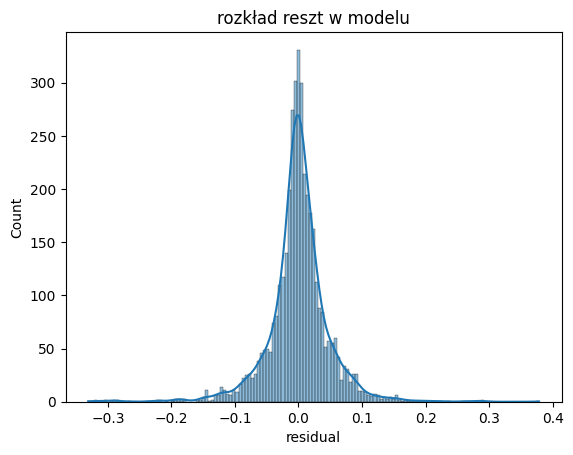

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram reszt
sns.histplot(residuals, kde=True)
plt.title("rozkład reszt w modelu")
plt.show()


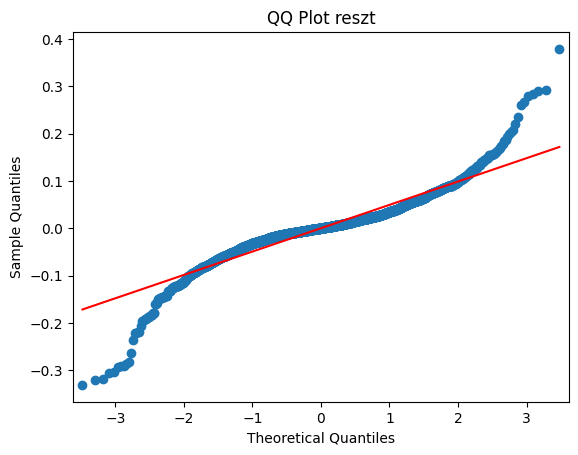

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ plot reszt
sm.qqplot(residuals, line='s')  # line='s' oznacza linię dopasowania
plt.title("QQ Plot reszt")
plt.show()


pominmy qq plot, bo sugeruje znaczne odchylenia

# dane stricte pod brazylie


In [ ]:
br = df1[df1.index.get_level_values('country_name') == 'Brazil']

In [ ]:
br = br.reset_index()

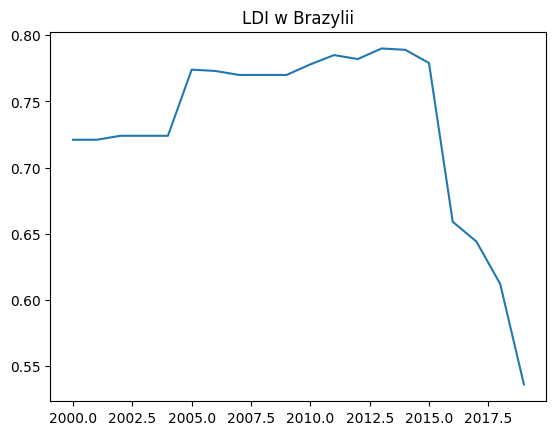

In [ ]:
# Utwórz wykres liniowy
sns.lineplot(x='year', y='libdem', data=br[['year', 'libdem']])

# Dodaj tytuł i etykiety osi
plt.title('LDI w Brazylii')
plt.xlabel('')
plt.ylabel('')

# Wyświetl wykres
plt.show()


In [ ]:
br[['year', 'libdem']]

,year,libdem
0,2000,0.721
1,2001,0.721
2,2002,0.724
3,2003,0.724
4,2004,0.724
5,2005,0.774
6,2006,0.773
7,2007,0.770
8,2008,0.770
9,2009,0.770
